**IMPORT CSV**

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_bu_azizah/co2/co2_satuan.csv')

**SET THE TIME TO .DATETIME FORMAT**

In [3]:
# overwriting data after changing format
df_csv['time']= pd.to_datetime(df_csv['time'])
 
# info of data
df_csv.info()
 
# display
print(df_csv.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202500 entries, 0 to 202499
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       202500 non-null  datetime64[ns]
 1   latitude   202500 non-null  float64       
 2   longitude  202500 non-null  float64       
 3   co2        202500 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.2 MB
        time  latitude   longitude         co2
0 2016-01-01     -8.88  110.910004  610.471237
1 2016-01-01     -8.88  110.960004  610.641677
2 2016-01-01     -8.88  111.010004  610.812117
3 2016-01-01     -8.88  111.060004  610.982557
4 2016-01-01     -8.88  111.110004  611.152997


In [4]:
df_csv['month'] = df_csv['time'].dt.month

In [5]:
df_csv['year'] = df_csv['time'].dt.year

**IMPORT SHP FILE**

In [6]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/peta_jatim/kabupaten.shp")

**CREATE GEOMETRY FROM SHP AND CSV**

In [7]:
geometry = gpd.points_from_xy(df_csv['longitude'], df_csv['latitude'])
gdf_csv = gpd.GeoDataFrame(df_csv, geometry=geometry, crs='EPSG:4326')

<Axes: >

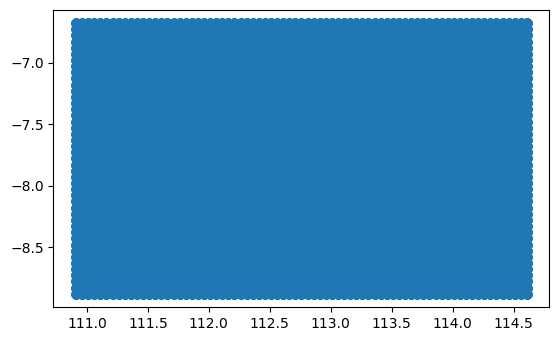

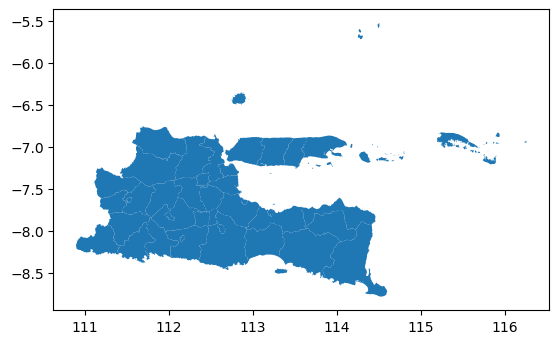

In [8]:
gdf_csv.plot()
gdf_shapefile.plot()

In [9]:
#join all the variables
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')

#add the columns
result_pop = result[['longitude', 'latitude', 'month', 'year', 'co2', 'IDKABKOTA', 'geometry', 'time']]

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_5473/3093974646.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 91920 entries, 294 to 202296
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   longitude  91920 non-null  float64       
 1   latitude   91920 non-null  float64       
 2   month      91920 non-null  int32         
 3   year       91920 non-null  int32         
 4   co2        91920 non-null  float64       
 5   IDKABKOTA  91920 non-null  object        
 6   geometry   91920 non-null  geometry      
 7   time       91920 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(2), object(1)
memory usage: 5.6+ MB


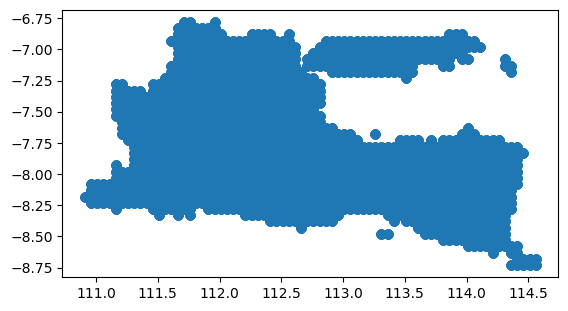

In [10]:
result_pop.plot()
result_pop.info()

**SHOW THE COLUMNS**

In [11]:
#input the columns to get the pm2.5 average/year
dissolved_result = result_pop.dissolve(by=['IDKABKOTA', 'month','year'], aggfunc='mean')

dissolved_result.reset_index(inplace=True)
dissolved_result.head()

,IDKABKOTA,month,year,geometry,longitude,latitude,co2,time
0,BANGKALAN,1,2016,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,628.520161,2016-01-01
1,BANGKALAN,1,2017,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,633.141176,2017-01-01
2,BANGKALAN,1,2018,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,631.054536,2018-01-01
3,BANGKALAN,1,2019,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,631.879542,2019-01-01
4,BANGKALAN,1,2020,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,641.815117,2020-01-01


In [12]:
#download data to .csv format
dissolved_result.to_csv('co2_all_year.csv')

**SET FOR MAPPING**

In [13]:
# ubah per month
import pandas as pd

In [14]:
#change into dataframe to drop the 'geometry' columns, etc
dissolved_result_df= pd.DataFrame(dissolved_result)
dissolved_result_df = dissolved_result_df.drop(['geometry'], axis = 1)

In [15]:
dissolved_result_df = dissolved_result_df.sort_values(by=['year', 'IDKABKOTA', 'month'])

In [16]:
#download data to .csv format
dissolved_result_df.to_csv('co2_kabkot_year.csv')

In [17]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')
print(polygon_result.columns)

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_5473/2287286776.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')


Index(['IDKABKOTA_left', 'COUNT', 'urutan_kab', 'KEPADATAN', 'SEXRATIO', 'TFR',
       'CBR', 'CPR', 'ALH3PLUS', 'UKP', 'NIKAHDINI', 'IMR', 'AHH', 'BUTAHURUF',
       'EKONOMI', 'TPT', 'TPAK', 'PRAKS', 'KS1', 'PRAKS_KS1', 'IPM',
       'JAMBANSEP', 'SAKIT', 'AIRBERSIH', 'LPP', 'ASFR_20_24', 'ASFR',
       'geometry', 'index_right', 'IDKABKOTA_right', 'month', 'year',
       'longitude', 'latitude', 'co2', 'time'],
      dtype='object')


**MAPPING**

In [18]:
import calendar
import matplotlib.pyplot as plt

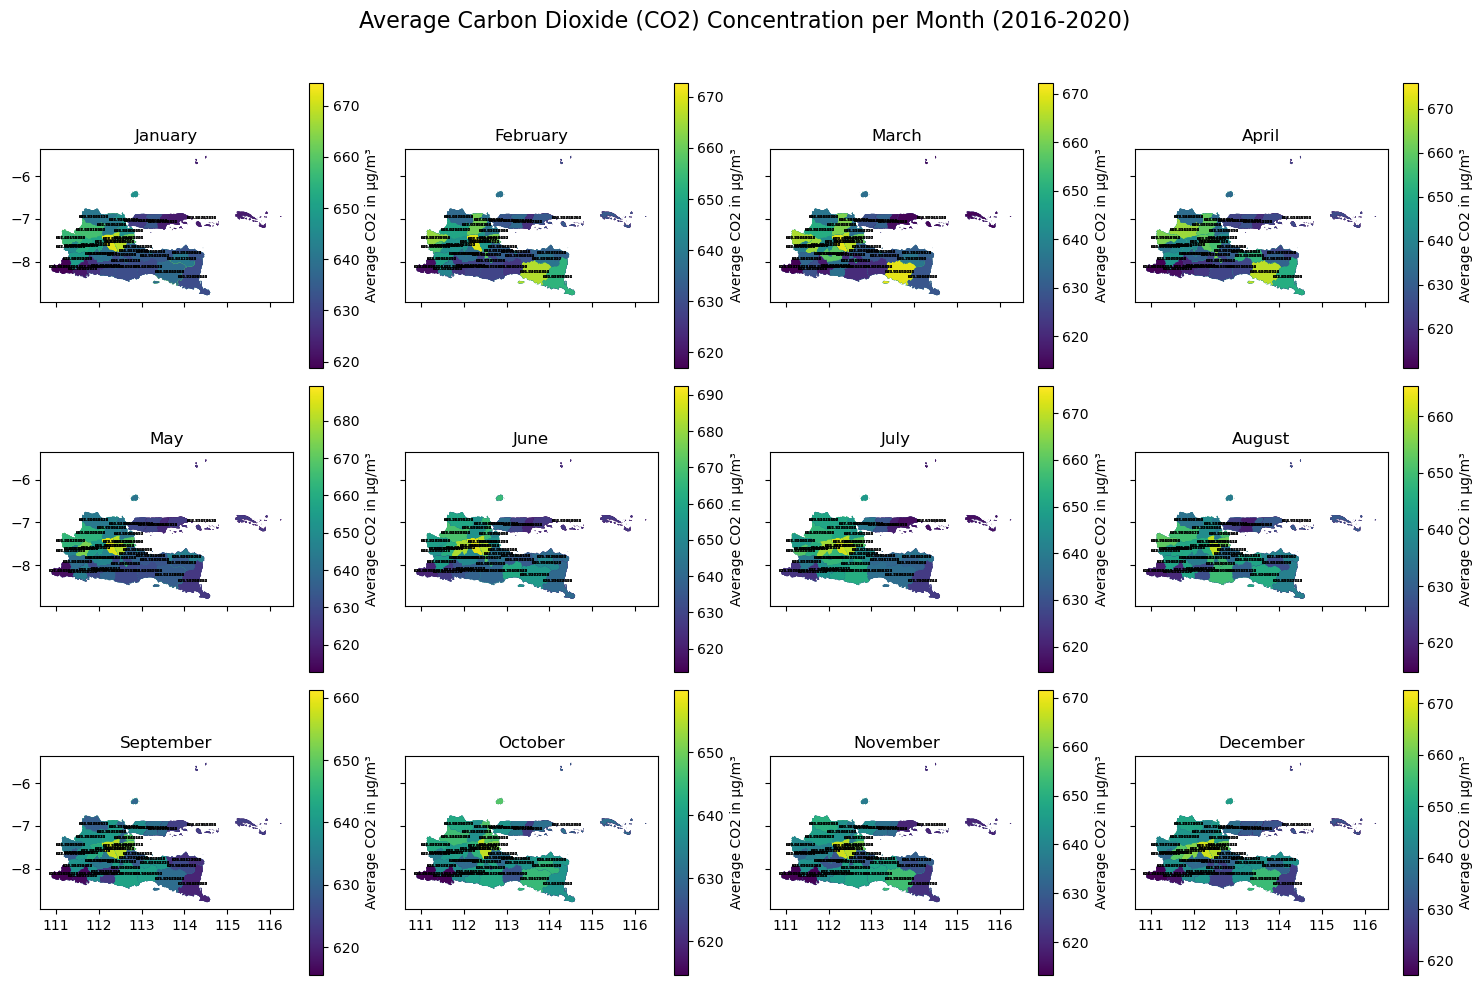

<Figure size 640x480 with 0 Axes>

In [19]:
# Create a figure with subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Average Carbon Dioxide (CO2) Concentration per Month (2016-2020)', fontsize=16)

# Iterate through each month and plot the data
for month, ax in zip(range(1, 13), axs.flatten()):
    # Filter data for the current month
    data_monthly = polygon_result[polygon_result['month'] == month]

    # Plot the map for the current month
    data_monthly.plot(ax=ax, column="co2", legend=True, legend_kwds={"label": "Average CO2 in µg/m³"})

    # Annotate each polygon with average PM2.5 value
    for idx, row in data_monthly.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['co2']:.8f}", fontsize=3, ha='center', va='center')

    ax.set_title(calendar.month_name[month])  # Menggunakan modul calendar untuk mendapatkan nama bulan

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# If u want to change the color, use this script
# The colors are limited based on cmap
# Put these script before plt.show()
cmap = plt.get_cmap('RdYlGn')
plt.set_cmap(cmap)

**GRAPHS**

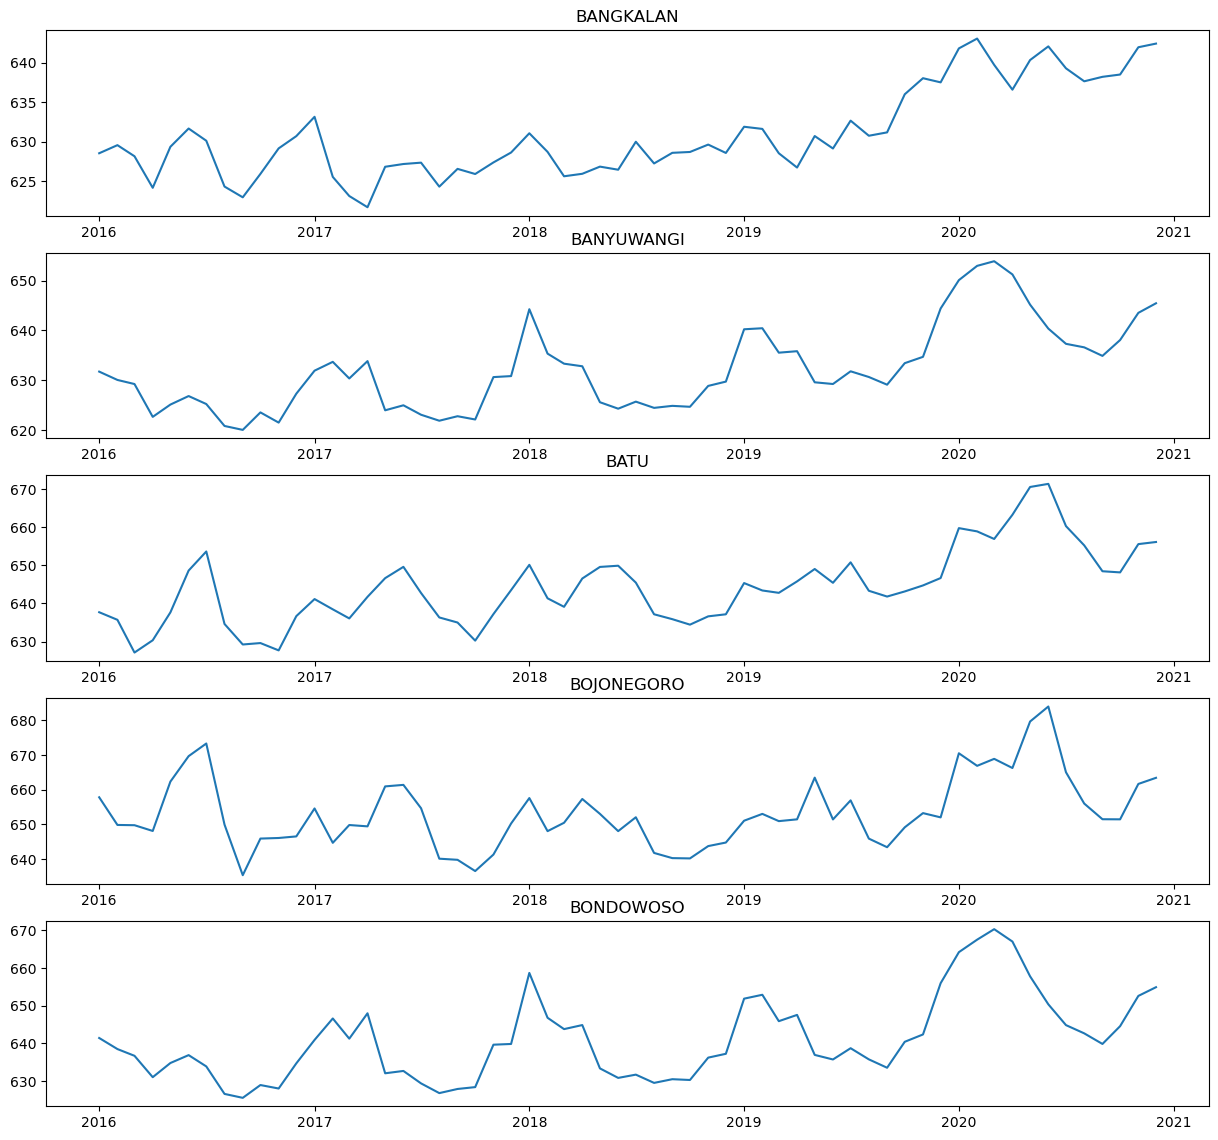

In [20]:
# There are 5 graphs, each city has 1 graph which shows time series from Jan 2018 to Dec 2022
fig  = plt.figure(figsize=(15,40))
cities = list(dissolved_result_df['IDKABKOTA'].unique())
dissolved_result_df = dissolved_result_df.set_index('time')

# Iterate through each month and plot the data
for city, ax in zip(cities, range(1,6)):
    # Filter data for the current wilayah admin
    data_city = dissolved_result_df[dissolved_result_df['IDKABKOTA'] == city]
    
    # Plot the map for the current kabkot
    fig.add_subplot(14, 1, ax)
    plt.plot(data_city['co2'])
    plt.title(city)
    #ax.set_title(f'{city}')